In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
import json

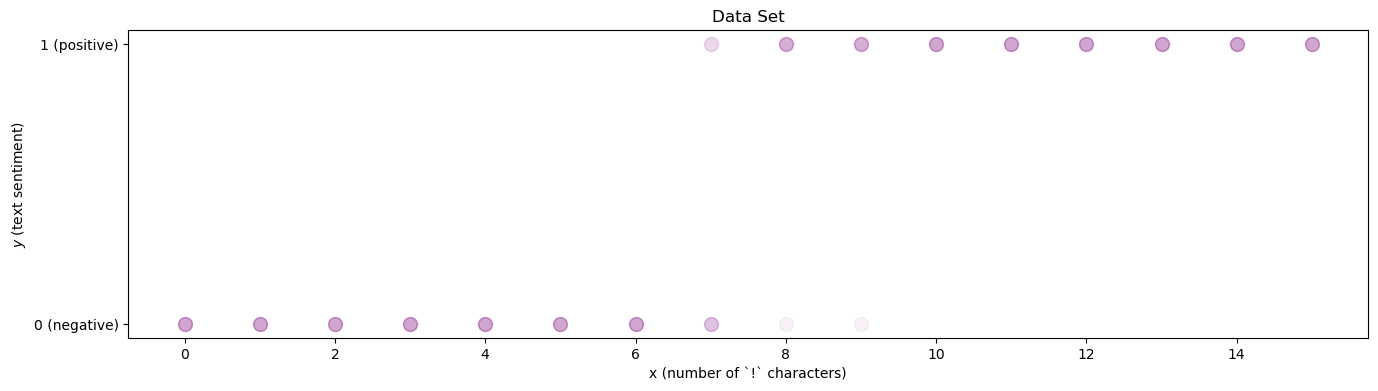

In [4]:
#------------------------------------------------------
# Open the Data File
#------------------------------------------------------
with open('../../data/json_file/dummydata.json') as f:
    data = json.load(f)
x,y = data['x'], data['y']

#------------------------------------------------------
# Plot the Data
#------------------------------------------------------
def plot_data():
    plt.plot(x,y, '.', markersize=20, color='purple', alpha=0.05)
    plt.title('Data Set')
    plt.xlabel('x (number of `!` characters)')
    plt.ylabel('$y$ (text sentiment)')
    plt.yticks(ticks = [0,1], labels = ['0 (negative)','1 (positive)'])

    
plt.figure(figsize=(16,4))
plot_data()
plt.show()



Because this is binary data, a lot of points overlap; the opacity of the points in the above plot is proportional to the number of overlapping data points. At a glance, it looks like a sigmoid might be a good way to model the relationship beween x and y

Logistic regression

$\color{orange}{\hat y = \frac{1}{1 + e ^{-(m * x + b)} } }$


Where $\hat y$ refers to the predictions generated by our model, so as to distinguish them from the actual values from the data,y . The exact shape of the sigmoid that estimates $\hat y$
from x, is controlled by two model paramers:m , and b . Let's write a simple function that generates a sigmoid, and plot it for a given value of m and b

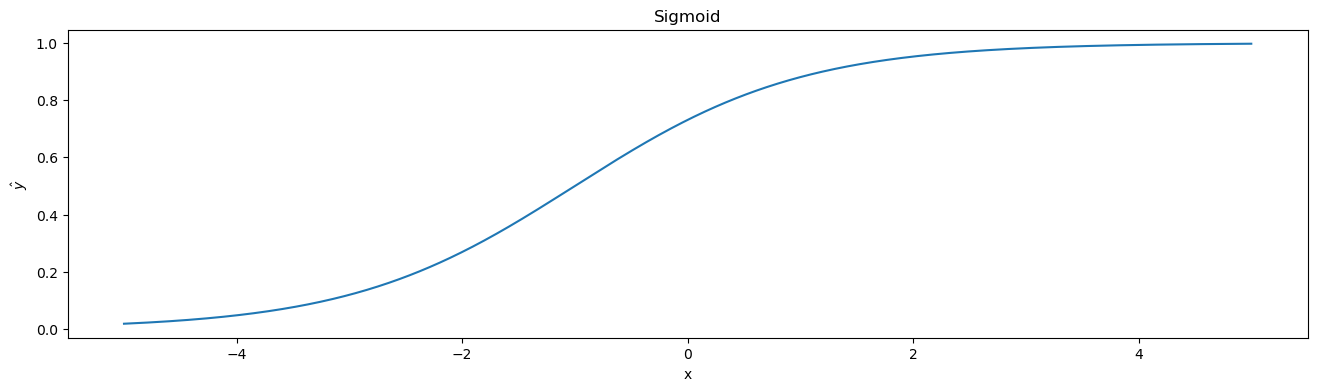

In [5]:
import math

#------------------------------------------------------
# A sigmoid function
#------------------------------------------------------
def sigmoid(m,b,x):
    return 1/(1 + math.exp(-(m*x + b)))

#------------------------------------------------------
# Function to plot a sigmoid
#------------------------------------------------------
def plot_sigmoid(m,b, xran = [-5,5], bold=False):
    x     = list(np.linspace(xran[0],xran[1],1000))
    y_hat = [sigmoid(m=m,b=b,x=x_i) for x_i in x]
    
    if bold == False:
        plt.plot(x,y_hat, label='Logistic regression (m =' + str(m) + ', b =' + str(b) + ')')
    else:
        plt.plot(x,y_hat, linewidth=4, label='Logistic regression (m =' + str(m) + ', b =' + str(b) + ')')
    plt.title('Sigmoid')
    plt.xlabel('x')
    plt.ylabel('$\hat{y}$')

    
    
#------------------------------------------------------
# Plot the sigmpid for m = 1 and b =1
#------------------------------------------------------
plt.figure(figsize=(16,4))
plot_sigmoid(1,1)


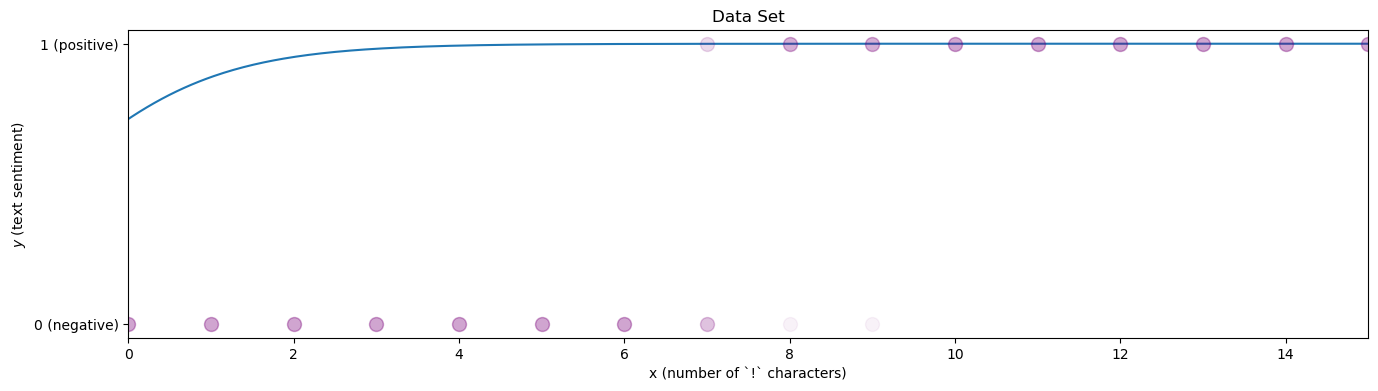

In [6]:


plt.figure(figsize=(16,4))
plot_sigmoid(1,1,[-15,15])
plot_data()
plt.xlim([0,15])
plt.show()




We can tell with just our eyes that this model (with its current paramters) is not a good fit. Our model, (the blue line) is (basically) always predicting that the sentiment is high. Let's try some different values of the
parameter to see if we can find a better fit.

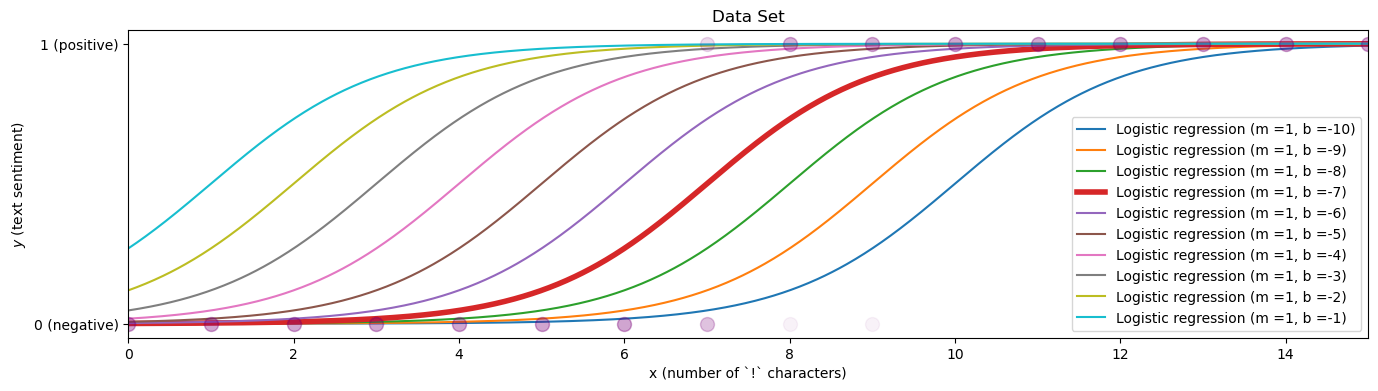

In [7]:


# Plot the Data and the Model for various values of b.
plt.figure(figsize=(16,4))
for b in range(-10,0):
    if b == -7:
        plot_sigmoid(1,b,[0,15], bold=True) 
    else:
        plot_sigmoid(1,b,[0,15]) 
plt.legend()
plot_data()
plt.xlim([0,15])
plt.show()







Just using our eyes, it seems that the bold red line (corresponding to when $b = -7 $
) provides the best fit; we still have one more paramter that we can tune, so let's hold b at -7 and tune next.

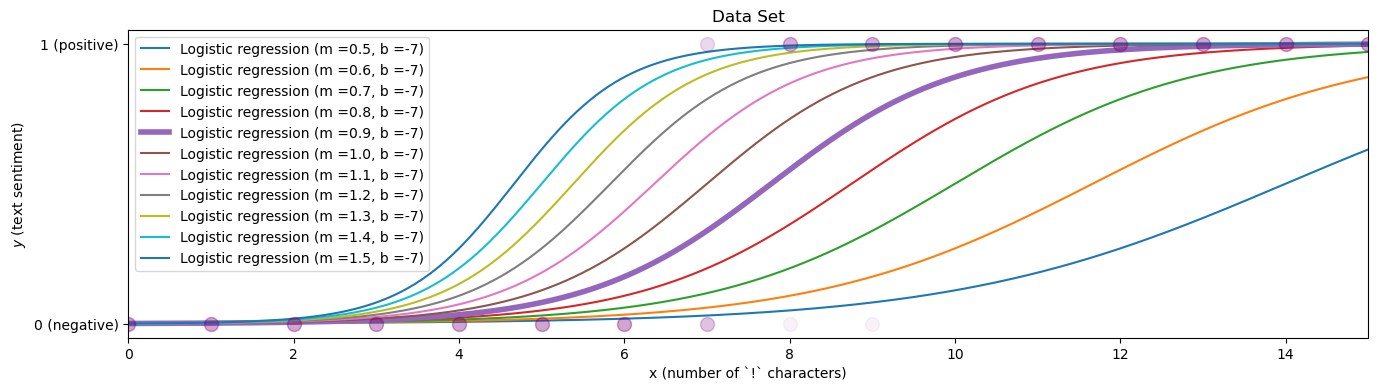

In [8]:
# Plot the Data and the Model for various values of b.
plt.figure(figsize=(16,4))
for m in np.linspace(0.5,1.5,11):
    m = np.round(m,2)
    if m == 0.9:
        plot_sigmoid(m,-7,[0,15], bold=True) 
    else:
        plot_sigmoid(m,-7,[0,15]) 
plt.legend()
plot_data()
plt.xlim([0,15])
plt.show()


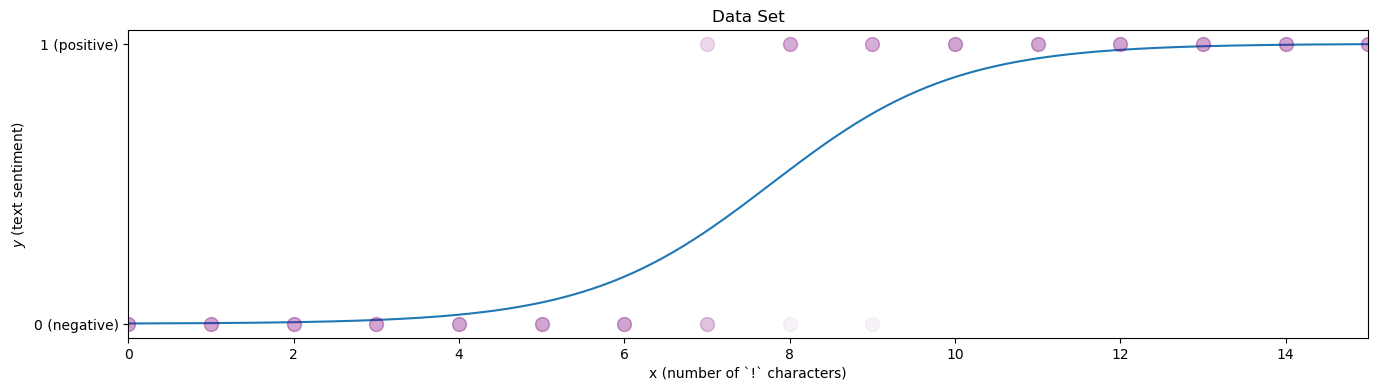

In [9]:
plt.figure(figsize=(16,4))
plot_sigmoid(0.9,-7,[-15,15])
plot_data()

plt.xlim([0,15])
plt.show()


it looks like might be a slightly better fit than ; Let's plot model with these new parameters over the data.

In [10]:
#------------------------------------------------------
# Cross Entropy Cost Function
#------------------------------------------------------
def CrossEntropy(yHat, y):
    if y == 1:
      return -math.log(yHat)
    else:
      return -math.log(1 - yHat)

The loss function provides a way to measure the $p(data|model$ (or the $p(model|data)$ if you're feeling Bayesian) with respect to the value of the model parameters. the cost function is referred to as Cross Entropy.

$Cross Entropy = -y \log(\hat{y}) - (1 - y) \log(1-\hat{y})$

In [11]:


#------------------------------------------------------
# Cross Entropy Cost Function
#------------------------------------------------------
def CrossEntropy(yHat, y):
    if y == 1:
      return -math.log(yHat)
    else:
      return -math.log(1 - yHat)



Notice that the Cross Entropy function computes the loss for a given pair of and
. Hence, we can compute the total cost of the model by summing (or averaging) the costs associated with each of the data points:

In [12]:
# A function to compute the loss given the paramters (m and b), and the data (x and y).
def compute_loss(m,b,x,y):
    y_hat = [sigmoid( m = m, b = b, x = x_i) for x_i in x]
    costs = [CrossEntropy(y_hat[i], y[i])    for i   in range(len(y))]
    return sum(costs)


In [13]:


# Import the data
x,y   = data['x'], data['y']
#------------------------------------------------------
# Compute the Total Costs for m=0.9 and b = -7
#------------------------------------------------------
print('----------------------------------------')
print('Loss when m=0.9 and b = -7         ')
print('----------------------------------------')
cost = compute_loss(m=0.9,b=-7,x=x,y=y)
print(np.round(cost,2))

#------------------------------------------------------
# Compute the Total Costs for m=1 and b = 1
#------------------------------------------------------
print('\n----------------------------------------')
print('Loss when m = 1 and b = 1          ')
print('----------------------------------------')
cost = compute_loss(m=1,b=1,x=x,y=y)
print(np.round(cost,2))



----------------------------------------
Loss when m=0.9 and b = -7         
----------------------------------------
17.99

----------------------------------------
Loss when m = 1 and b = 1          
----------------------------------------
287.14


In [14]:
#-------------------------------------------------
# Explore the relationship between m,b, and costs
#------------------------------------------------
costs, min_loss =  [], np.Inf

# For several values of m
for m in np.linspace(-3,3,50):
    cost_row = []
    
    # ... and several values of b
    for b in np.linspace(-9,9,50):
        
        # compute the loss and store it
        loss = compute_loss(m=m,b=b,x=x,y=y)
        cost_row.append(loss)
        
        # if this is the lowest loss, save it.
        if loss < min_loss:
            best_m, best_b = m, b
            min_loss = loss
            
    costs.append(cost_row)


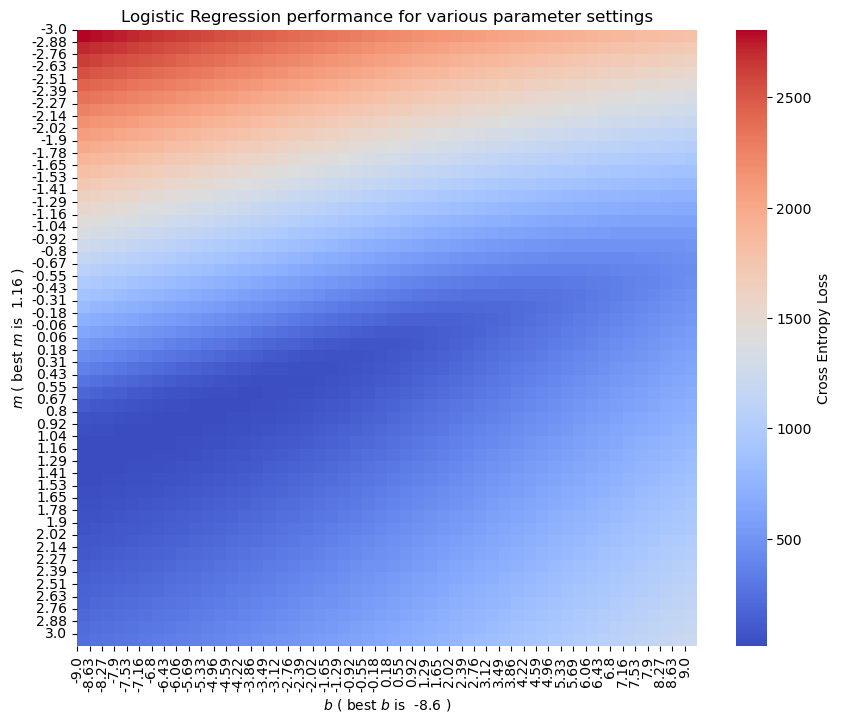

In [17]:
import seaborn as sns
#-------------------------------------------------------
#Generate a heatmap
#-------------------------------------------------------
plt.figure(figsize = (10,8))
ax = sns.heatmap(costs, cmap='coolwarm', cbar_kws={'label': 'Cross Entropy Loss'})

#-------------------------------------------------------
# Set the X Label and Tickmarks:
#-------------------------------------------------------
plt.xlabel("$b$" + " ( best $b$ is  " + str(best_b)[0:4] + " )")
plt.xticks(ticks   = range(0,50), labels   = [round(x,2) for x in np.linspace(-9,9,50)], rotation = 'vertical')

#-------------------------------------------------------
# Set the Y Labels and Tickmarks:
#-------------------------------------------------------
plt.ylabel("$m$" + " ( best $m$ is  " + str(best_m)[0:4] + " )")
plt.yticks(ticks    = range(0,50), labels   = [round(x,2) for x in np.linspace(-3,3,50)], rotation = 'horizontal')

plt.title("Logistic Regression performance for various parameter settings")
plt.show()


The above chart implies that the best parameter pair is actually when $b = 8.6$, and $m = 1.16$. It looks like our visual inspection ($m = 0.9$ and $b = -7$ ) was close, but unsurprisingly, having a formal definition of loss helped us find the values of m  and b more effectively than just glacing at this with our eyes; alas - we are only human. But wait! In the previous section we had applied regularization to our model - let's update the loss function here to see how that changes the results:

In [18]:
# A function to compute the loss given the paramters (m and b), and the data (x and y).
def compute_loss_reg(m,b,x,y):
    y_hat = [sigmoid( m = m, b = b, x = x_i) for x_i in x]
    costs = [CrossEntropy(y_hat[i], y[i])    for i   in range(len(y))]
    
    # UPDATED TO ADD L2 REGULARIZATION!
    regularized_costs = costs + pow(b,2) + pow(m,2)
    
    return sum(regularized_costs)


In [19]:


#-------------------------------------------------
# Explore the relationship between m,b, and costs
#------------------------------------------------
costs_reg, min_loss =  [], np.Inf

# For several values of m
for m in np.linspace(-3,3,50):
    cost_row = []
    
    # ... and several values of b
    for b in np.linspace(-9,9,50):
        
        # compute the loss and store it
        loss = compute_loss_reg(m=m,b=b,x=x,y=y)
        cost_row.append(loss)
        
        # if this is the lowest loss, save it.
        if loss < min_loss:
            best_m, best_b = m, b
            min_loss = loss
            
    costs_reg.append(cost_row)



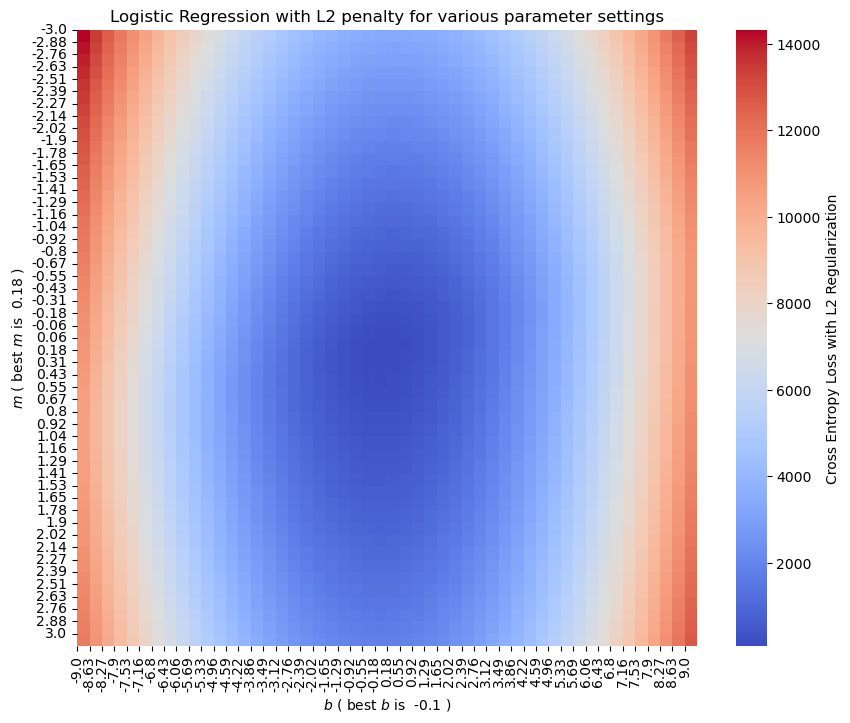

In [20]:


#-------------------------------------------------------
#Generate a heatmap
#-------------------------------------------------------
plt.figure(figsize = (10,8))
ax = sns.heatmap(costs_reg, cmap='coolwarm', cbar_kws={'label': 'Cross Entropy Loss with L2 Regularization'})
plt.xlabel("$b$" + " ( best $b$ is  " + str(best_b)[0:4] + " )")
plt.xticks(ticks   = range(0,50), labels   = [round(x,2) for x in np.linspace(-9,9,50)],rotation = 'vertical')
plt.ylabel("$m$" + " ( best $m$ is  " + str(best_m)[0:4] + " )")
plt.yticks(ticks    = range(0,50), labels   = [round(x,2) for x in np.linspace(-3,3,50)],rotation = 'horizontal')
plt.title("Logistic Regression with L2 penalty for various parameter settings")
plt.show()




With this modification to the loss function, we see that the new choice of the optimal parameters has changed; unsurpringly, they are much smaller than the values we saw without the regularization because the loss function adds more penalty for larger individual coefficient values!

Grid search
searching for best optimal value from the grid work for small number of parameter only.
We can express this relationship between the size of the grid search space for features with an equation:

$s = \prod_{i=1}^{n}r_i$

s is number of grid points to search

n is number of parameters

$r_i$ is resolution of the grid for feature i

This means that for a constant value of $r_i \neq $, the search space grows exponentially with the number of features!  For instance, to perform a grid search for the 18,330 features in our bag-of-words model at the tiny resolution of $r_i = 2$ would require us to search $2^18330$ possible parameter settings - that's more than the estimated number of particles in the observable universe. Here's that number, for your viewing pleasure:

In [21]:


print('------------------------------------------------------------')
print('Number of paramters settings to explore:')
print('------------------------------------------------------------')
print(pow(2,18330))



------------------------------------------------------------
Number of paramters settings to explore:
------------------------------------------------------------
758264145336405306878637894486192194534192842651993820927003093751627845117742525418143926718068976956693872325955619007145700459591141206269181228638213349579302265619908312686547273177334952358349306410553861996917505508008949049468713995845673030452770137583950650819276771304905282199848235149611118373422131075516383445896001401017975042577316391472113850854756745124932827644602973683827653949294810073962898265679032382083692740419620245377711783239615156176274319369244176110492118205179501111517117416398328901994673699441467978752573611695378759799907532049413382705701402710149920517532842746831148714438125476059427786208232533300363047693846846617774026010241986724900607235296237020887136904294680585239075229027096354424756000809752924572458776914884433160499263445493218298212022217818854175700101831479156345894481894877

## Gradient Descent


Clearly we will need a better way to solve for the optimal paramter values of the model than grid search. You may recall from earlier that there was a smooth convex gradient on the Cross Entropy Loss surface when we were optimizing
and with the grid search. That is, the loss grew consistently higher as we moved further away from the optimal values of and

. If we had a way to measure this gradient at a given location, then we wouldn't have to explore the whole grid to arrive at the the optimal point. Instead, we could:

    Start at a random point
    Check the gradient (i.e slope) at that point
    If the gradient is 0 - we're done, else take a small step in the negative direction of the gradient
    Go back to step 2...

We would perform this process for several steps until the gradient was 0 (or something very close to it), at which point we would know we've reached the botom of the Loss surface. This process is what is referred to as gradient descent in machine learning.

So how do we get the gradient of the loss? That's what derivatives are for! Recall from your introduction to calculus class that the derivative of a function provides the slope (i.e. the gradient) of that function at any point. So, if we wanted to know the gradient of the loss, we'll need to take it's derivative with respect to the paramters.


$\color{orange}{ \frac{\partial loss }{\partial m}  =  \frac{\partial(-y \log(\hat{y}) - (1 - y) \log(1-\hat{y}) )}{\partial m} = \frac{\partial( -y \log(\hat{y}))}{\partial m} + \frac{\partial(-(1 - y) \log(1-\hat{y}) )}{\partial m} }$

substituting the sigmoid equation in for $hat y$, and taking the derivate we obtain

$\color{orange}{ \frac{\partial( -y \log(\frac{1}{1 + e^{-(mx + b)}} ))}{\partial m} + \frac{\partial(-(1 - y) \log(1-\frac{1}{1 + e^{-(mx + b)}} ) )}{\partial m}} $

$\color{orange}{ y[-x \frac{1}{1 + e^{mx + b}}] + (1-y)[x\frac{e^{mx + b}}{1 + e^{mx + b}}]} $

restructure the terms a bit so we can redefine things in terms of $\hat y$ again

$\color{orange}{y[-x (1 - \frac{1}{1 + e^{-(mx + b)}})] + (1-y)[x \frac{1}{1 + e^{-(mx + b)}}]}$

$\color{orange}{y[-x(1 - \hat{y})] + (1-y)[x\hat{y}]}$

$\color{orange}{y[x( \hat{y} - 1)] + (1-y)[x\hat{y}]}$

Hence, the change in the loss with respect to m is described by: 

$\color{orange}{\frac{\partial loss }{\partial m} = y[x(\hat{y} - 1)] + (1-y)[x\hat{y}]}$

 for b:
 
$\color{orange}{\frac{\partial loss }{\partial b} = y[\hat{y} - 1] + (1-y)[\hat{y}]}$

Now that we've derived the gradient in the loss function with respect to the coefficients, let's write these equations, and all the other supporting functions down together as code so we can actually use them for an end-to-end gradient descent powered logistic regression!


In [22]:
#------------------------------------------------------
# Function to Compute the gradient in loss wrt m and b
#------------------------------------------------------
def compute_gradient(y,yhat,x):
    
    # gradient in m for all the data
    dl_dm = [y[i] *( x[i] * (yhat[i] - 1)) + (1 - y[i]) * (x[i] * yhat[i]) for i in range(len(y))] 
    
    # gradient in b for all the data
    dl_db = [y[i] *((yhat[i] - 1)) + (1 - y[i]) * yhat[i] for i in range(len(y))]   
    
    # return the sum of the gradients across all the data points
    return sum(dl_dm), sum(dl_db)


#------------------------------------------------------
# Cross Entropy Cost Function
#------------------------------------------------------
def CrossEntropy(yHat, y):
    if y == 1:
      return -math.log(yHat)
    else:
      return -math.log(1 - yHat)

#------------------------------------------------------
# Compute the Total Loss
#------------------------------------------------------
def compute_loss(m,b,x,y):
    y_hat = [sigmoid( m = m, b = b, x = x_i) for x_i in x]
    costs = [CrossEntropy(y_hat[i], y[i])    for i   in range(len(y))]
    return sum(costs)

#------------------------------------------------------
# A sigmoid function
#------------------------------------------------------
def sigmoid(m,b,x):
    return 1/(1 + math.exp(-(m*x + b)))




Now lets test out of gradient descent optimization of the paramter values for the same problem we solved using the grid search earlier and save the values of
and that we traverse in the course of the optimization:

In [23]:
#------------------------------------------------------
# Applying our Gradient Descent Optimizer
#------------------------------------------------------
# Initialize some data
x,y = data['x'], data['y']

# Initialize the parameters
m,b = 1,1 

# Initialize a learning rate
learning_rate = 0.005
epochs    = 3000

# save the values of b and m we traverse:
bs,ms = [], []

for count in range(epochs):
    # Compute the loss and print it.
    
    # Generate the predictions
    yhat = [sigmoid(m,b,x[i]) for i in range(len(x))]
    
    # Compute the gradients:
    dl_dm, dl_db = compute_gradient(y,yhat,x)
    
    # Take a step in the direction of the gradient.
    if dl_dm > 0:
        m-= learning_rate
    else:
        m+= learning_rate

    if dl_db > 0:
        b-= learning_rate
    else:
        b+= learning_rate
    bs.append(b)
    ms.append(m)



The learning_rate in the above code describes the size of the step we will take in the direction of the gradient and the epochs indicates how many steps we will take before returning the parameters. Let's plot values of
and over the 3000 epochs (iterations) of the algorithm:

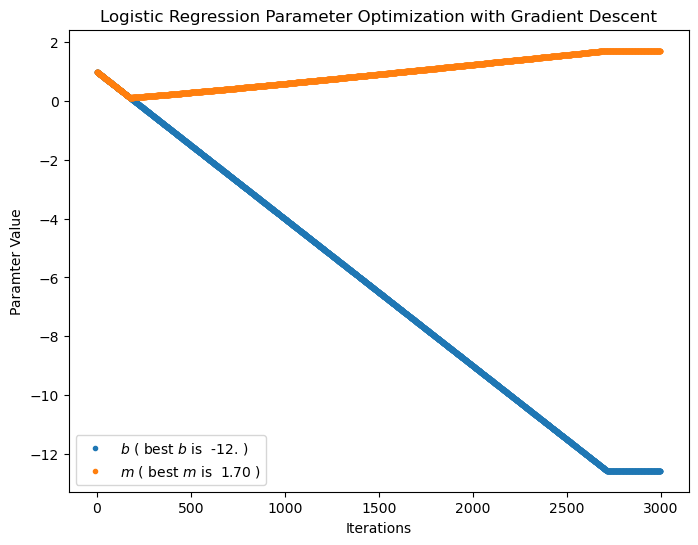

In [24]:

plt.figure(figsize = (8,6))
plt.plot(bs,'.', label="$b$" + " ( best $b$ is  " + str(bs[-1])[0:4] + " )")
plt.plot(ms,'.', label="$m$" + " ( best $m$ is  " + str(ms[-1])[0:4] + " )")
plt.xlabel("Iterations")
plt.ylabel("Paramter Value")
plt.title("Logistic Regression Parameter Optimization with Gradient Descent")
plt.legend()
plt.show()



We can see clearly from the figure above that our gradient descent algorithm converged. It seems to have arrived at a value of -12 for and 1.70 for . Let's compare the total loss that was computed by gradient descent to the value we arrived at by grid search:

In [25]:


#------------------------------------------------------
# The loss of the parameters from gradient descent
#------------------------------------------------------    
print('-----------------------------------------------')
print('Total Loss using Gradient Descent parameters')
print('-----------------------------------------------')
loss = compute_loss(m=m,b=b,x=x,y=y)
print(loss)

#------------------------------------------------------
# The Loss from Grid search
#------------------------------------------------------ 
print('\n-----------------------------------------------')
print('Total Loss using Grid search parameters')
print('-----------------------------------------------')
loss = compute_loss(m=1.16,b=-8.6,x=x,y=y)
print(loss)



-----------------------------------------------
Total Loss using Gradient Descent paramters
-----------------------------------------------
13.007785327271762

-----------------------------------------------
Total Loss using Grid search paramters
-----------------------------------------------
14.950966356748976



It seems that gradient descent is not only more computationally scalable with the number of features, but it even arrived at a better answer.


General Purpose Logistic Regression

One problem with our implementation of the logistic regression model above is that it only performs optimizarion of two parameters m and b . For this exercise, you will create a new logistic regression function that operates more closely to the basic sklearn implementation of logistic regression (i.e. without regualrization). That is, your code should take an input dataset x with n columns, and an binary output target y; your code should should determines the optimal values of n + 1 coefficients for that dataset using gradient descent.

Compare your implementation to Sklearn

Use your implementaiton from Part B. to classify the Rotton Tomatoes Movie review dataset after transforming the bag-of-words representation using PCA and retaining the first 10 principal components. Compare the performance of your logistic regression model and the parameter values against the sklearn Logistic Regression. Are the coefficients and performance the same? Why, or why not?
